# quantifying time reversal asymmetry
Tim Tyree<br>
3.17.2023

In [1]:
from IPython.display import clear_output
clear_output(wait=True)

import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *

os.chdir(nb_dir)
from lib import *

# import cupy, cudf
# from lib.rapids_func import *

import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

In [22]:
# from scipy.optimize import minimize
from scipy.optimize import dual_annealing
plt.close()
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

# define module

# dev

In [8]:
# #load spiral tip range time series from cache
# #######################
# # Luo-Rudy
# #######################
# #WJ's data for LR model (200x200)
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
# range_data_dir=f'{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_range_timeseries.pkl'
# # # #my data for LR model (200x200) diffCoeff=0.001
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_range_timeseries.pkl'
# # #my data for LR model (200x200) diffCoeff=0.0005
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilation_range_timeseries.pkl'

# #######################
# # Fenton-Karma
# #######################
# # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilation_range_timeseries.pkl'
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_1/annihilation_range_timeseries.pkl'
# # # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilation_range_timeseries.pkl'
# # # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilation_range_timeseries.pkl'

# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
# # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/tippos_per_c_001_annihilation_range_timeseries.pkl'

# # #150x150
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/tippos_per_c_001_annihilation_range_timeseries.pkl'
# # #200x200
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'
# # #250x250
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/tippos_per_001_annihilation_range_timeseries.pkl'


# # #################
# # # creations
# # ################
# # # #FK
# # # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_005_annihilation_range_timeseries.pkl'
# # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_005_creation_range_timeseries.pkl'
# # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_005_creation_range_timeseries.pkl'
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_range_timeseries.pkl'
# # # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/150x150/tippos_per_c_001_creation_range_timeseries.pkl'

# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_005_creation_range_timeseries.pkl'
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/250x250/tippos_per_001_creation_range_timeseries.pkl'




# # #LR 200x200
# # range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_creation_range_timeseries.pkl'

In [837]:
#recall mean squared range data for LR
msr_dir_annihil_fk = f'{nb_dir}/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_msr.csv'
msr_dir_creation_fk = f'{nb_dir}//Data/from_wjr/positions_fk/200x200/tippos_per_c_001_creation_msr.csv'
msr_dir_annihil_lr = f'{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv'
msr_dir_creation_lr = f'{nb_dir}/Data/from_wjr/positions_lr/200x200/tippos_per_001_creation_msr.csv'
assert os.path.exists(msr_dir_annihil_lr)
assert os.path.exists(msr_dir_creation_lr)

# msr_dir_annihil = msr_dir_annihil_lr
# msr_dir_creation = msr_dir_creation_lr
# model_name='Luo-Rudy'
#heretim
#repeat with LR model
msr_dir_annihil = msr_dir_annihil_fk
msr_dir_creation = msr_dir_creation_fk
model_name='Fenton-Karma'

In [501]:
df_msra = pd.read_csv(msr_dir_annihil)
df_msrc = pd.read_csv(msr_dir_creation)

In [502]:
x_valuesa=df_msra['tdeath_avg'].values
y_valuesa=df_msra['MSR'].values
yerr_valuesa=df_msra['Delta_MSR'].values

x_valuesc=df_msrc['tdeath_avg'].values
y_valuesc=df_msrc['MSR'].values
yerr_valuesc=df_msrc['Delta_MSR'].values

In [839]:
# select msr from the full models for fitting
min_tdeath=100. #ms  #LR
min_tdeath=300. #ms  #FK 
# min_tdeath=600. #ms  #FK 
max_tdeath=1500. #ms  #FK 
printing=True

boo=x_valuesc>=min_tdeath
boo&=x_valuesc<max_tdeath
t_values=x_valuesc[boo].copy()*1e-3
msr_values=y_valuesc[boo].copy() 
# msr_values-= np.min(msr_values)
#measure D
dict_output = compute_95CI_ols(x=t_values,y=msr_values)
Dc = dict_output['m']/8
Delta_Dc = dict_output['Delta_m']/8

boo=x_valuesa>=min_tdeath
boo&=x_valuesa<max_tdeath
t_values=x_valuesa[boo].copy()*1e-3
msr_values=y_valuesa[boo].copy() 
# msr_values-= np.min(msr_values)
#measure D
dict_output = compute_95CI_ols(x=t_values,y=msr_values)
Da = dict_output['m']/8
Delta_Da = dict_output['Delta_m']/8
if printing:
    print(f"- D = m/8 = {Dc:.4f} +/- {Delta_Dc:.4f} (creation fit to t'<{min_tdeath:.4f} ms)")
    print(f"- D = m/8 = {Da:.4f} +/- {Delta_Da:.4f} (annihilation fit to t'<{min_tdeath:.4f} ms)")
#     print_dict(dict_output)


D = m/8 = 0.0769 +/- 0.006035197135102729 (creation fit to t'<300.0 ms)
D = m/8 = 0.1618 +/- 0.008252353786919015 (annihilation fit to t'<300.0 ms)


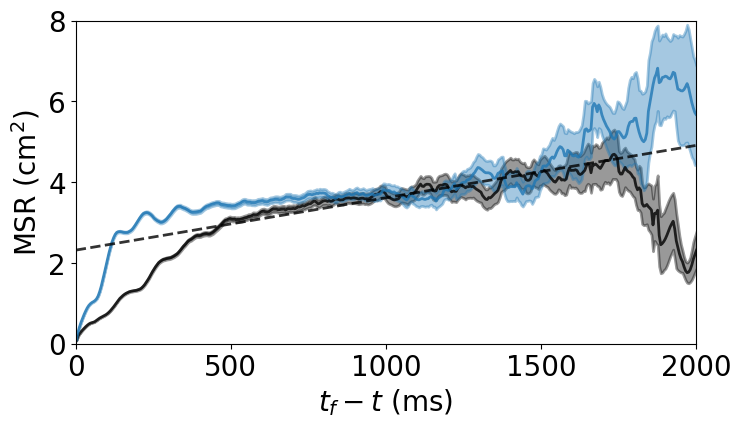

In [504]:
c='C0'
# c='C1'
xlim = [0,2000]
#plot expected
fig,ax=plt.subplots(figsize=(8,4.2))
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(x_valuesa,y_valuesa,lw=2,alpha=0.8,c='k')
ax.fill_between(x_valuesa,y_valuesa-yerr_valuesa,y_valuesa+yerr_valuesa,lw=2,alpha=0.4,color='k')
ax.plot(x_valuesc,y_valuesc,lw=2,alpha=0.8,c=c)
ax.fill_between(x_valuesc,y_valuesc-yerr_valuesc,y_valuesc+yerr_valuesc,lw=2,alpha=0.4,color=c)
#plot linear fit
xv = np.arange(xlim[0],xlim[1],1)
yv = 1e-3*dict_output['m']*xv + dict_output['b']
ax.plot(xv,yv,'k--',lw=2,alpha=0.8)
#format plot
format_plot(ax=ax,xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
ax.set_xlim(xlim)
ax.set_ylim([0,8])
plt.show()

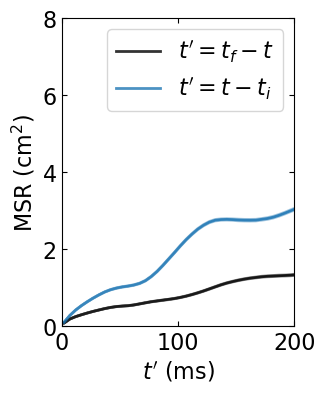

In [505]:
#plot expected
# c='C0'
# c='C1'
# c='k'
# figsize=(8,4.2)
figsize=(3,4)
fontsize=16
fig,ax=plt.subplots(figsize=figsize)
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(x_valuesa,y_valuesa,lw=2,alpha=0.8,c='k',label=r"$t'=t_f-t$")
ax.fill_between(x_valuesc,y_valuesc-yerr_valuesc,y_valuesc+yerr_valuesc,lw=2,alpha=0.4,color=c)
format_plot(ax=ax,xlabel=r"$t'$ (ms)",ylabel=r'MSR (cm$^2$)',fontsize=fontsize)

ax.fill_between(x_valuesa,y_valuesa-yerr_valuesa,y_valuesa+yerr_valuesa,lw=2,alpha=0.4,color='k')
ax.plot(x_valuesc,y_valuesc,lw=2,alpha=0.8,c=c,label=r"$t'=t-t_i$")

ax.set_xlim([0,200])
# ax.set_xlim([0,2000])
ax.legend(fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_ylim([0,8])
plt.show()

In [506]:
#recall lifetime distribution
# msr_dir_bootstrap='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_annihilation_msr.csv'
trgt_str = 'msr.csv'
range_data_dir = msr_dir_annihil.replace(trgt_str,'range_timeseries.pkl')
# range_data_dir = msr_dir_creation.replace(trgt_str,'range_timeseries.pkl')
print(f"{range_data_dir=}")
assert os.path.exists(range_data_dir)

range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_annihilation_range_timeseries.pkl'


In [890]:
data_lst=load_from_pickle(range_data_dir)
num_termination_events = len(data_lst)
print(f"loaded range timeseries from {len(data_lst)} termination events")
df=pd.concat(data_lst)
del data_lst
print(f"num. obs: {df.shape[0]}")
minlifetime_values = df.groupby(by=['trial_num','annihilation_index'])['tdeath'].max().values
meanx,Delta_meanx,num_obsx,p_normalx=comp_mean_bootstrap_uncertainty(minlifetime_values)
num_annihilations=minlifetime_values.shape[0]
printing=True
if printing:
    print(f" - mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} ms (N={num_obsx}, p_normal: {p_normalx:.4f}) from {num_termination_events} termination events")
Gamma = meanx
Delta_Gamma = Delta_meanx

loaded range timeseries from 80 termination events
num. obs: 3846532
 - mean lifetime: 105.3196 +/- 1.6405 ms (N=36179, p_normal: 0.3970) from 80 termination events


In [508]:
x_values = x_valuesa
y_values = y_valuesa
# x_values = x_valuesc
# y_values = y_valuesc

In [516]:
# select msr from the full models for fitting
max_tdeath=60. #ms #LR
# max_tdeath=80. #ms 
# max_tdeath=100. #ms
# max_tdeath=120. #ms FK
# max_tdeath=300. #ms
printing=True
#INPUT: FK MODEL
boo=x_values<max_tdeath
t_values=x_values[boo].copy()*1e-3
msr_values=y_values[boo].copy() 
# msr_values-= np.min(msr_values)
D=0
# D=0.365 #cm^2/s, as observed
# D=0.25 #cm^2/s, as observed more recently
# D=0. #cm^2/s
# D=0.1 #cm^2/s
# D=0.2 #cm^2/s

# # #INPUT: LR MODEL
# max_tdeath=100. #ms
# boo=x_values<max_tdeath
# t_values=x_values[boo].copy()*1e-3
# msr_values=y_values[boo].copy()
# msr_values-= np.min(msr_values)
# D=0.58 #cm^2/s, as observed
# Gamma = 33.4 # 20. # ~ 40/2 #ms #for predicting alinear only
print(f"{max_tdeath=} ms")
maxiter=10000
print(f"num. epochs: {maxiter}")
res = anneal_msr_fit(t_values,msr_values,D,
                   bounds = ((0, 100), (0, 100), (50, 150), (-3.15,3.15)),
                   maxiter=maxiter,seed=42, no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
a0,a1,period,phase=res.x
print(f"simulated annealing fit: {a0=:.4f}, {a1=:.4f}, {period=:.4f}, {phase=:.4f} --> {rmse=:.4f} cm^2")

alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")

maxiter=100000
print(f"num. epochs: {maxiter}")
res = anneal_msr_fit(t_values,msr_values,D,
                   bounds = ((0, 100), (0, 100), (50, 150), (-3.15,3.15)),
                   maxiter=maxiter,seed=42+1, no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
a0,a1,period,phase=res.x
print(f"simulated annealing fit: {a0=:.4f}, {a1=:.4f}, {period=:.4f}, {phase=:.4f} --> {rmse=:.4f} cm^2")
alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")

max_tdeath=60.0 ms
num. epochs: 10000
simulated annealing fit: a0=5.1580, a1=4.2301, period=143.9397, phase=1.3368 --> rmse=0.0199 cm^2
	attraction coefficient: a0=5.1580, a1=4.2301, z=4.5974, phase=1.3368 --> alinear=4.3477 cm^2/s
num. epochs: 100000
simulated annealing fit: a0=5.4312, a1=4.4919, period=149.9670, phase=1.4088 --> rmse=0.0197 cm^2
	attraction coefficient: a0=5.4312, a1=4.4919, z=4.4126, phase=1.4088 --> alinear=4.5110 cm^2/s


In [517]:
phasea=phase
omegaa=omega
a0a=a0
a1a=a1
za=z
alineara=alinear

In [864]:
period_of_oscillation=period*1e-3 #seconds
omega=2*np.pi/period_of_oscillation
msr_values_affoscillatory=4*((2*D+a0)*t_values+(a1/omega)*(np.sin(omega*t_values+phase)-np.sin(phase)))
yhat = eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1)#,**kwargs)
mpea = 100*np.mean(np.abs(msr_values_affoscillatory - msr_values)/msr_values)
rmsea=float(rmse)

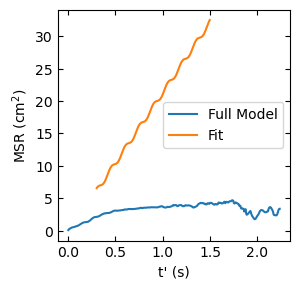

In [859]:
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x_values*1e-3,y_values,label='Full Model')
plt.plot(t_values,msr_values_affoscillatory,label='Fit')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.legend(fontsize=fontsize)
plt.show()

In [513]:
#LR without -=MSR(0)
# num. epochs: 100000
# simulated annealing fit: a0=5.8142, a1=12.4957, period=104.9243, phase=-0.8647 --> rmse=0.0572 cm^2
# 	attraction coefficient: a0=5.8142, a1=12.4957, z=1.9981, phase=-0.8647 --> alinear=11.2437 cm^2/s
#LR with -=MSR(0)
# num. epochs: 100000
# simulated annealing fit: a0=5.0189, a1=12.1878, period=97.3443, phase=-1.1653 --> rmse=0.0642 cm^2
# 	attraction coefficient: a0=5.0189, a1=12.1878, z=2.1536, phase=-1.1653 --> alinear=10.1496 cm^2/s

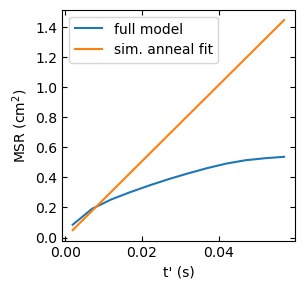

In [514]:
#visualize the fit zoomed
boo=x_values<max_tdeath
t_values=x_values[boo].copy()*1e-3

figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
period_of_oscillation=period*1e-3 #seconds
omega=2*np.pi/period_of_oscillation
# msr_values_affoscillatory=4*((2*D+a0)*t_values+(a1/omega)*(np.sin(omega*t_values+phase)-np.sin(phase)))
msr_values_affoscillatory=4*((2*D+a0a)*t_values+(a1a/omegaa)*(np.sin(omegaa*t_values+phasea)-np.sin(phasea)))
plt.plot(t_values,msr_values,label='full model')
plt.plot(t_values,msr_values_affoscillatory,label='sim. anneal fit')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR (cm$^2$)",fontsize=fontsize)
plt.legend(fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.show()

In [860]:
# #TODO: see if a simple phase shift can model the creation rates

# # phase=0
# # phase=-np.pi/4
# # phase=-2*np.pi/4
# # phase=-3*np.pi/4
# # phase=-np.pi
# # phase=-5*np.pi/4
# # phase=-6*np.pi/4
# # phase=-7*np.pi/4
# # phase=-7*np.pi/4
# #RESULT: it probably needs to depend on phasea
# # phase=np.pi-phasea

# # phase=0 + phasea #nb
# # phase=-np.pi/4 + phasea
# # phase=-2*np.pi/4 + phasea
# # phase=-3*np.pi/4 + phasea
# # phase=-np.pi + phasea
# # phase=-5*np.pi/4 + phasea
# # phase=-6*np.pi/4 + phasea
# # phase=-7*np.pi/4 + phasea #nb

# phase= phasea + np.pi/4 #<<<<<<<<<<<<<<<<
# # phase= phasea + np.pi/2
# # phase= phasea - np.pi/2

# # phase=phasea
# # phase=phasea - np.pi/2
# # phase=phasea + np.pi

In [486]:
boo=x_valuesc<max_tdeath
t_values=x_valuesc[boo].copy()*1e-3
msr_values=y_valuesc[boo].copy() 
# msr_values-= np.min(msr_values)

In [861]:
# #visualize the fit zoomed
# figsize=(3,3)
# fontsize=10
# fig,ax=plt.subplots(figsize=figsize)
# period_of_oscillation=period*1e-3 #seconds
# omega=2*np.pi/period_of_oscillation
# msr_values_affoscillatory=4*((2*D+a0)*t_values+(a1/omega)*(np.sin(omega*t_values+phase)-np.sin(phase)))
# # plt.plot(t_values,msr_values,label='Full Model')
# plt.plot(x_values*1e-3,y_values,label='Full Model')
# plt.plot(t_values,msr_values_affoscillatory,label='Fit')
# # plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
# format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR (cm$^2$)",fontsize=fontsize)
# ax.tick_params(top=True, right=True,direction='in',which='both')
# plt.legend(fontsize=fontsize)
# plt.show()

In [862]:
# x_values = x_valuesa
# y_values = y_valuesa
x_values = x_valuesc
y_values = y_valuesc

In [490]:
# select msr from the full models for fitting
# max_tdeath=60. #ms #LR
# max_tdeath=80. #ms #LR
max_tdeath=120. #ms #FK
# max_tdeath=300. #ms FK
printing=True
#INPUT: FK MODEL
boo=x_values<max_tdeath
t_values=x_values[boo].copy()*1e-3
msr_values=y_values[boo].copy() 
# msr_values-= np.min(msr_values)
D=0
# D=0.365 #cm^2/s, as observed
# D=0.25 #cm^2/s, as observed more recently
# D=0. #cm^2/s
# D=0.1 #cm^2/s
# D=0.2 #cm^2/s

# # #INPUT: LR MODEL
# max_tdeath=100. #ms
# boo=x_values<max_tdeath
# t_values=x_values[boo].copy()*1e-3
# msr_values=y_values[boo].copy()
# msr_values-= np.min(msr_values)
# D=0.58 #cm^2/s, as observed
# Gamma = 33.4 # 20. # ~ 40/2 #ms #for predicting alinear only
print(f"{max_tdeath=} ms")
maxiter=10000
print(f"num. epochs: {maxiter}")
res = anneal_msr_fit(t_values,msr_values,D,
                   bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15)),
                   maxiter=maxiter,seed=42, no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
a0,a1,period,phase=res.x
print(f"simulated annealing fit: {a0=:.4f}, {a1=:.4f}, {period=:.4f}, {phase=:.4f} --> {rmse=:.4f} cm^2")

alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")

maxiter=100000
print(f"num. epochs: {maxiter}")
res = anneal_msr_fit(t_values,msr_values,D,
                   bounds = ((0, 100), (0, 100), (50, 300), (-3.15,3.15)),
                   maxiter=maxiter,seed=42+1, no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
a0,a1,period,phase=res.x
print(f"simulated annealing fit: {a0=:.4f}, {a1=:.4f}, {period=:.4f}, {phase=:.4f} --> {rmse=:.4f} cm^2")
alinear = comp_alinear(a0,a1,period,Gamma,phase)
omega = 2*np.pi/period
z = Gamma*omega
print(f"\tattraction coefficient: {a0=:.4f}, {a1=:.4f}, {z=:.4f}, {phase=:.4f} --> {alinear=:.4f} cm^2/s")

max_tdeath=120.0 ms
num. epochs: 10000
simulated annealing fit: a0=4.9574, a1=3.6249, period=97.9470, phase=-0.0247 --> rmse=0.0199 cm^2
	attraction coefficient: a0=4.9574, a1=3.6249, z=6.7561, phase=-0.0247 --> alinear=5.0481 cm^2/s
num. epochs: 100000
simulated annealing fit: a0=4.9548, a1=3.6259, period=97.8757, phase=-0.0276 --> rmse=0.0199 cm^2
	attraction coefficient: a0=4.9548, a1=3.6259, z=6.7610, phase=-0.0276 --> alinear=5.0468 cm^2/s


In [492]:
phasec=phase
omegac=omega
a0c=a0
a1c=a1
zc=z
alinearc=alinear

In [865]:
period_of_oscillation=period*1e-3 #seconds
omega=2*np.pi/period_of_oscillation
msr_values_affoscillatory=4*((2*D+a0)*t_values+(a1/omega)*(np.sin(omega*t_values+phase)-np.sin(phase)))
yhat = eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1)#,**kwargs)
mpec = 100*np.mean(np.abs(msr_values_affoscillatory - msr_values)/msr_values)
rmsec=float(rmse)

In [867]:
#heretim
#TODO: wrap to foo the simulated annealing fitter for oscillatory
#input: ??
#output: dict_oscillatory
dict_oscillatory=dict(
    phasea=phasea,
    omegaa=omegaa,
    a0a_plus_2Da=a0a,
    Da=Da,Delta_Da=Delta_Da,
    a1a=a1a,
    za=za,
    alineara=alineara,
    phasec=phasec,
    omegac=omegac,
    a0c_plus_2Dc=a0c,
    Dc=Dc,Delta_Dc=Delta_Dc,
    a1c=a1c,
    zc=zc,
    alinearc=alinearc,
    rmsea=rmsea,
    rmsec=rmsec,
    mpea=mpea,
    mpec=mpec,
)
#return dict_oscillatory

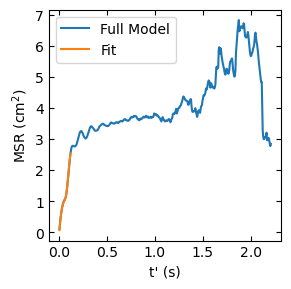

In [494]:
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
period_of_oscillation=period*1e-3 #seconds
omega=2*np.pi/period_of_oscillation
msr_values_affoscillatory=4*((2*D+a0)*t_values+(a1/omega)*(np.sin(omega*t_values+phase)-np.sin(phase)))
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x_values*1e-3,y_values,label='Full Model')
plt.plot(t_values,msr_values_affoscillatory,label='Fit')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.legend(fontsize=fontsize)
plt.show()

In [491]:
# # #LR creation without -=MSR(0)  #phase looks right
# simulated annealing fit: a0=40.4204, a1=38.0062, =279.1885, phase=2.0000 --> rmse=0.0138 cm^2
# 	attraction coefficient: a0=40.4204, a1=38.0062, z=0.7509, phase=2.0000 --> alinear=13.7133 cm^2/s
# #LR creation with -=MSR(0)  #phase looks wrong
# simulated annealing fit: a0=8.7454, a1=6.7059, period=75.7176, phase=-0.6360 --> rmse=0.0325 cm^2
# 	attraction coefficient: a0=8.7454, a1=6.7059, z=2.7688, phase=-0.6360 --> alinear=10.6405 cm^2/s

# #LR creation without -=MSR(0)  #phase looks wrong
# simulated annealing fit: a0=36.9217, a1=33.3791, period=295.7780, phase=2.0119 --> rmse=0.0784 cm^2
# 	attraction coefficient: a0=36.9217, a1=33.3791, z=0.7088, phase=2.0119 --> alinear=13.1962 cm^2/s

#LR creation with -=MSR(0)  #phase looks wrong
# simulated annealing fit: a0=10.9847, a1=7.3532, period=131.5693, phase=0.6428 --> rmse=0.0728 cm^2
# 	attraction coefficient: a0=10.9847, a1=7.3532, z=1.5934, phase=0.6428 --> alinear=10.6632 cm^2/s



# subtract the two traces

In [577]:
#input:  df_msra,df_msra, lotsa kwargs
#output: dict_dmsr_viewer
maxt=390 #LR
maxt=2000 #FK
# maxt=1200 #FK
# maxt=410
# maxt=425
boo = df_msra['tdeath_avg']<=maxt
x_valuesa=df_msra[boo]['tdeath_avg'].values
y_valuesa=df_msra[boo]['MSR'].values
yerr_valuesa=df_msra[boo]['Delta_MSR'].values

boo = df_msrc['tdeath_avg']<=maxt
x_valuesc=df_msrc[boo]['tdeath_avg'].values
y_valuesc=df_msrc[boo]['MSR'].values
yerr_valuesc=df_msrc[boo]['Delta_MSR'].values

#interpolate creation values to annihilation values

#moving average of traces as late times
tmin_smooth=150 #ms
tmin_smooth=200 #ms #LR
tmin_smooth=1000 #ms #FK
# window=40 #frames
window=5 #frames
# polyorder=3
polyorder=3
boo = x_valuesc>tmin_smooth
msr_valuesc = y_valuesc.copy()
Delta_msr_valuesc = yerr_valuesc.copy()
msr_valuesc[boo] = savgol_filter(msr_valuesc[boo],window,polyorder)
Delta_msr_valuesc[boo] = savgol_filter(Delta_msr_valuesc[boo],window,polyorder)

boo = x_valuesa>tmin_smooth
msr_valuesa = y_valuesa.copy()
Delta_msr_valuesa = yerr_valuesa.copy()
msr_valuesa[boo] = savgol_filter(msr_valuesa[boo],window,polyorder)
Delta_msr_valuesa[boo] = savgol_filter(Delta_msr_valuesa[boo],window,polyorder)

#compute spline interpolants of traces
smoothing=0
xy_valuesc = np.stack([msr_valuesc,Delta_msr_valuesc])
tck_c, _ = splprep(x=xy_valuesc,s=smoothing,per=0,u=x_valuesc*1e-3)
xy_valuesa = np.stack([msr_valuesa,Delta_msr_valuesa])
tck_a, _ = splprep(x=xy_valuesa,s=smoothing,per=0,u=x_valuesa*1e-3)

#compute difference of interpolants
# tmax=0.4 #s
tmax=maxt*1e-3 #LR
DT=0.001 #too low resolution for fourier
# tmax=1.3 #FK
t_values = np.arange(0,tmax,DT)
msra_values = np.array(splev(t_values, tck_a))[0]
msrc_values = np.array(splev(t_values, tck_c))[0]
Delta_msra_values = np.array(splev(t_values, tck_a))[1]
Delta_msrc_values = np.array(splev(t_values, tck_c))[1]
# dmsr_values = msrc_values - msra_values
# Delta_dmsr_values = np.sqrt( Delta_msrc_values**2 + Delta_msra_values**2 )

#moving average of axis values
boo = t_values > tmin_smooth*1e-3
window_ma=window
# window_ma=window*5
window_ma=160
window_ma=80
window_ma=40 #LR
window_ma=400 #FK
# window_ma=20
# window_ma=2
yc_values = np.concatenate([msrc_values[~boo],moving_average(msrc_values[boo],window_ma)])
Delta_yc_values = np.concatenate([Delta_msrc_values[~boo],moving_average(Delta_msrc_values[boo],window_ma)])
ya_values = np.concatenate([msra_values[~boo],moving_average(msra_values[boo],window_ma)])
Delta_ya_values = np.concatenate([Delta_msra_values[~boo],moving_average(Delta_msra_values[boo],window_ma)])
t_values = np.concatenate([t_values[~boo],moving_average(t_values[boo],window_ma)])

dmsr_values = yc_values - ya_values
Delta_dmsr_values = np.sqrt( Delta_yc_values**2 + Delta_ya_values**2 )
dict_dmsr_viewer=dict(t=t_values,dmsr=dmsr_values, Delta_dmsr=Delta_dmsr_values,
                            msrc=yc_values,Delta_msrc=Delta_yc_values,
                            msra=ya_values,Delta_msra=Delta_ya_values)
# return dict_dmsr_viewer

In [580]:
#save results to df
df_dmsr = pd.DataFrame(dict_dmsr_viewer)
dmsr_dir = msr_dir_annihil.replace('annihilation_msr.csv','dmsr.csv')
df_dmsr.to_csv(dmsr_dir,index=False)
print(f"{dmsr_dir=}")

dmsr_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_dmsr.csv'


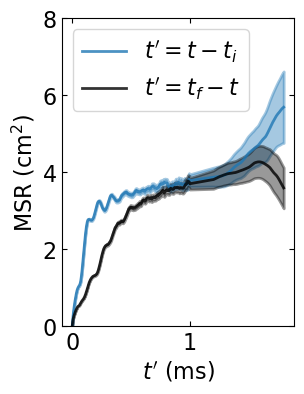

In [578]:
#plot expected
# c='C0'
# c='C1'
# c='k'
# figsize=(8,4.2)
figsize=(3,4)
fontsize=16
fig,ax=plt.subplots(figsize=figsize)
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.fill_between(t_values,yc_values-Delta_yc_values,yc_values+Delta_yc_values,lw=2,alpha=0.4,color=c)
ax.plot(t_values,yc_values,lw=2,alpha=0.8,c=c,label=r"$t'=t-t_i$")

ax.plot(t_values,ya_values,lw=2,alpha=0.8,c='k',label=r"$t'=t_f-t$")
ax.fill_between(t_values,ya_values - Delta_ya_values,ya_values+Delta_ya_values,lw=2,alpha=0.4,color='k')
format_plot(ax=ax,xlabel=r"$t'$ (ms)",ylabel=r'MSR (cm$^2$)',fontsize=fontsize)
# ax.set_xlim([0,200])
# ax.set_xlim([0,2000])
ax.legend(fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_ylim([0,8])
plt.show()

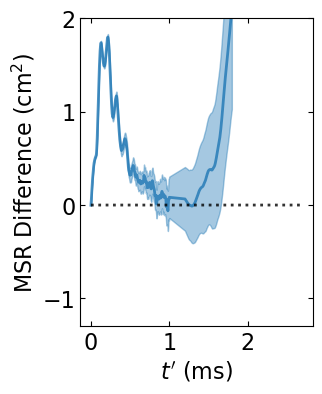

In [579]:
#plot expected
# c='C0'
# c='C1'
# # figsize=(8,4.2)
# figsize=(3,4)
# fontsize=16
fig,ax=plt.subplots(figsize=figsize)
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(t_values,dmsr_values,lw=2,alpha=0.8,c=c)
ax.fill_between(t_values,dmsr_values - Delta_dmsr_values,dmsr_values + Delta_dmsr_values,alpha=0.4,color=c)
#plot dotted line at zero
ax.plot(t_values*1.5,0.*t_values,lw=2,alpha=0.8,c='k',linestyle=':')

# format_plot
format_plot(ax=ax,xlabel=r"$t'$ (ms)",ylabel=r'MSR Difference (cm$^2$)',fontsize=fontsize)
# ax.set_xticks([0,0.1,0.2,0.3,0.4])
# ax.set_xlim([0,0.4])
# ax.legend(fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_ylim([-1.3,2])
plt.show()

# TODO: plot an overlay of the two differences

- Q: what is the peak-to-peak period and amplitude of MSR difference?

then, 
- Q: is MSR difference expected to be positive or negative for the average particle?
- TODO(bonus): attempt to fit the traces with a sinosoid times the exponential lifetime distribution


In [581]:
#LR
# dmsr_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_lr/200x200/tippos_per_001_dmsr.csv'
#FK
# dmsr_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/positions_fk/200x200/tippos_per_c_001_dmsr.csv'

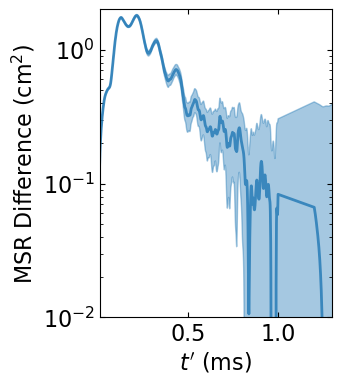

In [582]:
#plot expected
# c='C0'
# c='C1'
# # figsize=(8,4.2)
# figsize=(3,4)
# fontsize=16
fig,ax=plt.subplots(figsize=figsize)
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
# ax.plot(t_values,dmsr_values**2,lw=2,alpha=0.8,c=c)
# ax.fill_between(t_values,(dmsr_values - Delta_dmsr_values)**2,(dmsr_values + Delta_dmsr_values)**2,alpha=0.4,color=c)
ax.plot(t_values,dmsr_values,lw=2,alpha=0.8,c=c)
ax.fill_between(t_values,dmsr_values - Delta_dmsr_values,dmsr_values + Delta_dmsr_values,alpha=0.4,color=c)
#plot dotted line at zero
ax.plot(t_values*1.5,0.*t_values,lw=2,alpha=0.8,c='k',linestyle=':')

# format_plot
format_plot(ax=ax,xlabel=r"$t'$ (ms)",ylabel=r'MSR Difference (cm$^2$)',fontsize=fontsize)
# ax.set_xticks([0,0.1,0.2,0.3,0.4])
# ax.set_xlim([0,0.4])
# ax.legend(fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
ax.set_xlim([1e-2,1.3])
ax.set_ylim([1e-2,2])
# ax.set_ylim([-1.3,2])
# ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [879]:
#fit a gamma distribution to the square of ^that
#NOTA BENE: the fitted inverse rate parameter is literally the halflife of time-reversal asymmetry
tmax=0.5 #s
t_values = df_dmsr['t'].values
dmsr_values = df_dmsr['dmsr'].values
x=t_values[t_values<tmax]
y=dmsr_values[t_values<tmax]
X=0,1,1,1
comp_sse_gamma_distrib(X,*args)

135.4806618088648

In [585]:
def comp_sse_gamma_distrib(X,*args):
    loc,scale,a,mag = X
    args = x,y
    yhat = mag*scipy.stats.gamma.pdf(x,a=a,loc=loc,scale=scale)
    loss = np.sum((yhat - y)**2)
    return loss

In [595]:
seed=42
maxiter=10000 #12 second runtime
bounds = ((0, 10), (0, 10), (0, 10), (0,10))
no_local_search=True
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_gamma_distrib,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=no_local_search)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
loc,scale,a,mag=res.x
print(f"simulated annealing fit: {loc=:.4f}, {scale=:.4f}, {a=:.4f}, {mag=:.4f} --> {rmse=:.4f} cm^2")
print(f"half life of time-reversal asymmetry: {scale/2=:.4f} seconds")

seed=43
maxiter=100000 #2min run time
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_gamma_distrib,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=no_local_search)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
loc,scale,a,mag=res.x
print(f"simulated annealing fit: {loc=:.4f}, {scale=:.4f}, {a=:.4f}, {mag=:.4f} --> {rmse=:.4f} cm^2")
print(f"half life of time-reversal asymmetry: {scale/2=:.4f} seconds")

num. epochs: 10000
simulated annealing fit: loc=0.0636, scale=0.1609, a=1.5753, mag=0.5697 --> rmse=0.1095 cm^2
half life of time-reversal asymmetry: scale/2=0.0805 seconds
num. epochs: 100000
simulated annealing fit: loc=0.0297, scale=0.1088, a=2.2789, mag=0.5334 --> rmse=0.0922 cm^2
half life of time-reversal asymmetry: scale/2=0.0544 seconds


In [598]:
seed=43
maxiter=10000
# maxiter=100000 #2min run time
bounds = ((0, 1), (0, 10), (1, 10), (0,1))
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_gamma_distrib,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=False)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
loc,scale,a,mag=res.x
print(f"simulated annealing fit: {loc=:.4f}, {scale=:.4f}, {a=:.4f}, {mag=:.4f} --> {rmse=:.4f} cm^2")
print(f"half life of time-reversal asymmetry: {scale/2=:.4f} seconds")

num. epochs: 10000
simulated annealing fit: loc=0.0005, scale=0.0867, a=3.0336, mag=0.5253 --> rmse=0.0881 cm^2
half life of time-reversal asymmetry: scale/2=0.0434 seconds


In [600]:
seed=43
# maxiter=10000
maxiter=100000 #2-5 minute run time
bounds = ((0, 1), (0, 10), (1, 10), (0,1))
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_gamma_distrib,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=False)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
loc,scale,a,mag=res.x
print(f"simulated annealing fit: {loc=:.4f}, {scale=:.4f}, {a=:.4f}, {mag=:.4f} --> {rmse=:.4f} cm^2")
print(f"half life of time-reversal asymmetry: {scale/2=:.4f} seconds")

num. epochs: 100000
simulated annealing fit: loc=0.0005, scale=0.0867, a=3.0336, mag=0.5253 --> rmse=0.0881 cm^2
half life of time-reversal asymmetry: scale/2=0.0434 seconds


In [ ]:
# simulated annealing fit: loc=0.0860, scale=3.1017, a=0.8731, mag=2.7207 --> rmse=0.2123 cm^2
# num. epochs: 10000 & 1000004
# simulated annealing fit: loc=0.0005, scale=0.0867, a=3.0336, mag=0.5253 --> rmse=0.0881 cm^2
# half life of time-reversal asymmetry: scale/2=0.0434 seconds

In [601]:
yhat = mag*scipy.stats.gamma.pdf(x,a=a,loc=loc,scale=scale)

Q: does the gamma distribution fit look reasonable?

$$f(x, a) = M_\Delta\frac{(x/\lambda)^{\alpha-1} e^{-x/\lambda}}{\Gamma(\alpha)}$$

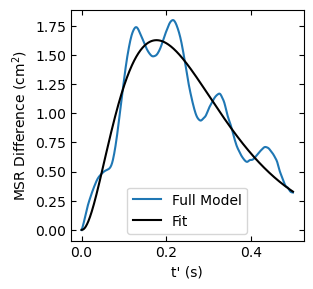

In [605]:
#input: loc,scale,a,mag, x, y
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,y,label='Full Model')
plt.plot(x,yhat,label='Fit',color='k')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR Difference (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.legend(fontsize=fontsize)
plt.show()

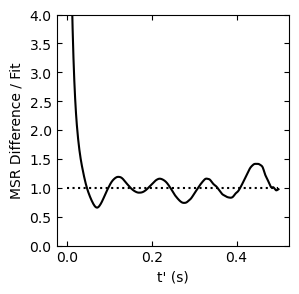

In [617]:
#TODO: take the ratio of the yaxis
#input: loc,scale,a,mag, x, y
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,y/yhat,label='Fit',color='k')
plt.plot(x,0.*x+1,color='k',linestyle=':')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR Difference / Fit",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
# plt.legend(fontsize=fontsize)
ax.set_ylim([0,4])
plt.show()

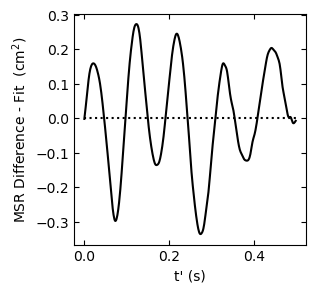

In [633]:
#TODO: take the ratio of the yaxis
#input: loc,scale,a,mag, x, y
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,y-yhat,label='Fit',color='k')
plt.plot(x,0.*x,color='k',linestyle=':')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR Difference - Fit  (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
# plt.legend(fontsize=fontsize)
# ax.set_ylim([0,4])
plt.show()

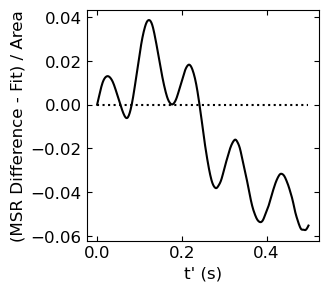

In [871]:
width=200
height=width
DX=0.025
A = (DX*width) ** 2

#TODO: take the ratio of the yaxis
#input: loc,scale,a,mag, x, y
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
color='k'
fontsize=12
yosc = (y-yhat)/A

fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,yosc,label='Fit',color=color)
plt.plot(x,0.*x,color='k',linestyle=':')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"(MSR Difference - Fit) / Area",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
# plt.legend(fontsize=fontsize)
# ax.set_ylim([0,4])
plt.show()

(410,)

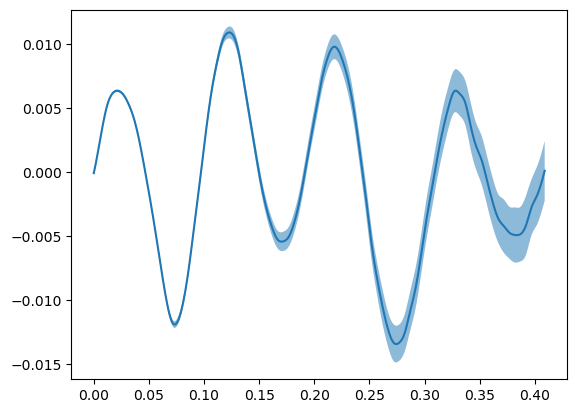

In [723]:
width=200
DX=0.025
A = (DX*width) ** 2

tmax=0.41
DT=0.001 #too low resolution for fourier
# DT=0.000001 
# tmax=1.3 #FK
x = np.arange(0,tmax,DT)
msra_values = np.array(splev(x, tck_a))[0]
msrc_values = np.array(splev(x, tck_c))[0]
Delta_msra_values = np.array(splev(x, tck_a))[1]
Delta_msrc_values = np.array(splev(x, tck_c))[1]

yhat = mag*scipy.stats.gamma.pdf(x,a=a,loc=loc,scale=scale)
yosc = (msrc_values - msra_values - yhat)/A
Delta_yosc = np.sqrt((Delta_msra_values**2 + Delta_msra_values**2))/A
plt.plot(x,yosc)
plt.fill_between(x,yosc-Delta_yosc,yosc+Delta_yosc,alpha=0.5,)
x.shape

In [724]:
yosc.shape

(410,)

maxfreq=7.3171 Hz
periodfft=0.1367 seconds
periodfft/2=0.0683 seconds


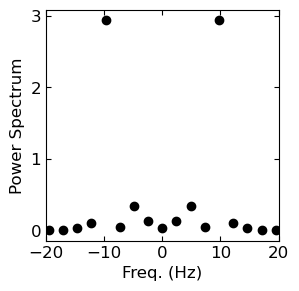

In [725]:
#TODO: measure the mean peak-to-peak period of ibid
#input: x,yosc
#output: period, Delta_period
signal = yosc
fourier = np.fft.fft(signal)
n = signal.size
# timestep = np.around(np.median(np.diff(x)),7)
timestep = np.around(np.median(np.diff(x)),15)
freq = np.fft.fftfreq(n, d=timestep)
power = np.real(fourier.conj()*fourier)
#estimate the dominant frequency
imax = np.argmax(power[freq>0])
maxpowr = power[imax]
maxfreq = freq[imax]
periodfft = 1/maxfreq
print(f"{maxfreq=:.4f} Hz")
print(f"{periodfft=:.4f} seconds")
print(f"{periodfft/2=:.4f} seconds")
# periodhat=0.1367 seconds
# periodhat=0.1367 seconds

fig,ax=plt.subplots(figsize=figsize)
plt.scatter(freq,power,color='k')
# plt.plot(freq,power,'k',lw=2)
plt.xlim([-20,20])
format_plot(ax=plt.gca(),xlabel='Freq. (Hz)',ylabel='Power Spectrum' ,fontsize=fontsize)
plt.tick_params(top=True, right=True,direction='in',which='both')

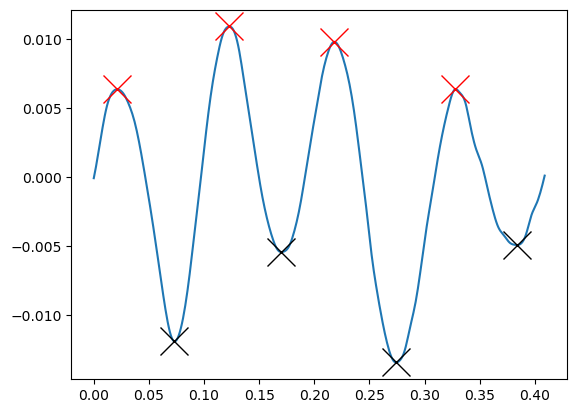

In [742]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
peaks, _ = find_peaks(yosc, height=0)
troughs, _ = find_peaks(-yosc, height=0)
plt.plot(x,yosc)
plt.plot(x[peaks], yosc[peaks], "rx",lw=40,markersize=20)
plt.plot(x[troughs], yosc[troughs], "kx",markersize=20,lw=4)
# plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

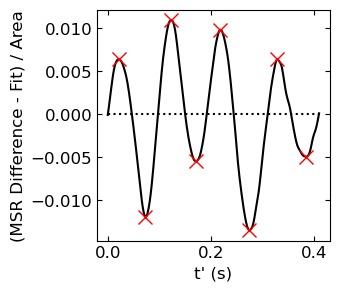

In [745]:
width=200
DX=0.025
A = (DX*width) ** 2

#TODO: take the ratio of the yaxis
#input: loc,scale,a,mag, x, y
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
color='k'
fontsize=12

fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,yosc,label='Fit',color=color)
plt.plot(x,0.*x,color='k',linestyle=':')
plt.plot(x[peaks], yosc[peaks], "rx",lw=40,markersize=10)
plt.plot(x[troughs], yosc[troughs], "rx",markersize=10,lw=4)

# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"(MSR Difference - Fit) / Area",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
# plt.legend(fontsize=fontsize)
# ax.set_ylim([0,4])
plt.show()

In [776]:
t_extrema = np.concatenate(list(zip(x[peaks],x[troughs])))
periodpp_values=2*np.diff(t_extrema)
periodpp = np.mean(periodpp_values)
Delta_periodpp = comp_mean_bootstrap_uncertainty?
periodpp,Delta_periodpp,num_obs,p_normal=comp_mean_bootstrap_uncertainty(periodpp_values)
printing=True
if printing:
    print(f"Nice Result: mean lifetime is not significantly different from the oscillation period:")
    print(f"\t- mean peak-to-peak period: {periodpp:.4f} +/- {Delta_periodpp:.4f} s (N={num_obs}, {p_normal=:.4f})")
    meanx,Delta_meanx,num_obs,p_normal=comp_mean_bootstrap_uncertainty(minlifetime_values*1e-3)
    print(f"\t- mean lifetime: {meanx:.4f} +/- {Delta_meanx:.4f} s (N={num_obs}, {p_normal=:.4f})")

Nice Result: mean lifetime is not significantly different from the oscillation period:
	- mean peak-to-peak period: 0.1037 +/- 0.0050 s (N=7, p_normal=0.6343)
	- mean lifetime: 0.1053 +/- 0.0016 s (N=36179, p_normal=0.8689)


__Analytic model for expected time dependence of the time-reversal asymmetry:__

Let  $MSR = MSR_{Annihi}$ and $MSR^\dagger=MSR_{Creati}$. <br>
Then, we are interested in the dimensionless quantity, $y=(MSR^\dagger(t') - MSR(t'))/A$.  We considered the following analytic model:
$$
y(t') = \Delta_0(t'/\tau_0)^{\nu_0} e^{-t'/\tau_0} + \Delta_1 ( \sin(2\pi t'/\tau_1 + \phi_1 ) - \sin(\phi_1) ),
$$

where $\Delta_0=M_\Delta / \Gamma(\alpha_0)$ and $\nu_0 = \alpha_0-1$ for $M_\Delta$ and $\alpha_0$ from the least-squares fit to the gamma distribution.

This oscillatory defect model fits the observed rates reasonably well for all time scales, suggesting the time-reversal asymmetry is accurately quantified by the six parameters, $\Delta_0$, $\Delta_1$, $\tau_0$, $\tau_1$, $\nu_0$, and $\phi_1$.

Universality of the time-reversal asymmetry is shown in terms of these parameters in Fig. SX, where we systematically varied the domain size.  This domain size independence is explained by the dynamics of creation and annihilation events being governed by local properties intrinsic to spiral tips from the full cardiac models.

In [873]:
def comp_sse_dmsr(X,*args):
    Delta0,tau0,alpha0,Delta1,tau1,phi1 = X
    x,y = args
    yhat = Delta0*scipy.stats.gamma.pdf(x,a=alpha0,loc=0,scale=tau0)
    yhat -= Delta1*np.sin(2*np.pi*x/tau1 + phi1)
    yhat += Delta1*np.sin(phi1)
    return np.sum((yhat - y)**2)

In [784]:
seed=43
maxiter=1000
# maxiter=10000
# maxiter=100000 #2-5 minute run time
bounds = ((0, 1), (0, 1), (1, 10), (0,10), (0.001,1), (-3.15,3.15))
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_dmsr,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
delta0,tau0,alpha0,Delta1,tau1,phi1=res.x
Delta0=delta0/scipy.special.gamma(alpha0)
nu0 = 1 - alpha0
print(f"simulated annealing fit: {delta0=:.4f}, {tau0=:.4f}, {alpha0=:.4f} ")
print(f"          - continued fit: {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
print(f"          - derived params: ")
print(f"              - Delta0=delta0/scipy.special.gamma(alpha0): {Delta0:.4f} cm^2")
print(f"              - nu0 = 1 - alpha0: {nu0:.4f}")
print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
print(f"the oscillation period: {tau1=:.4f} seconds")

num. epochs: 1000
simulated annealing fit: delta0=0.5235, tau0=0.0429, alpha0=5.2595 
          - continued fit: Delta1=0.2112, tau1=0.7969, phi1=0.3656 --> rmse=0.7370 cm^2
          - derived params: 
              - Delta0=delta0/scipy.special.gamma(alpha0): 0.0146 cm^2
              - nu0 = 1 - alpha0: -4.2595
time scale of time-reversal asymmetry: tau0=0.0429 seconds
the oscillation period: tau1=0.7969 seconds


In [ ]:
# #no local search
# num. epochs: 1000
# simulated annealing fit: Delta0=0.6247, tau0=0.0396, alpha0=4.8916 --> rmse=0.7222 cm^2
# simulated annealing fit: Delta1=0.4947, tau1=0.6661, phi1=-2.3100 --> rmse=0.7222 cm^2
# half life of time-reversal asymmetry: tau0/2=0.0198 seconds
# half oscillation period: tau1/2=0.3331 seconds

In [ ]:
# num. epochs: 1000
# simulated annealing fit: Delta0=1.0000, tau0=0.8641, alpha0=1.1286 --> rmse=0.7687 cm^2
# simulated annealing fit: Delta1=0.8389, tau1=0.7738, phi1=-0.2970 --> rmse=0.7687 cm^2
# half life of time-reversal asymmetry: tau0/2=0.4320 seconds
# half oscillation period: tau1/2=0.3869 seconds
# num. epochs: 10000
# simulated annealing fit: Delta0=0.7718, tau0=0.0450, alpha0=4.8781 --> rmse=0.7003 cm^2
# simulated annealing fit: Delta1=0.5833, tau1=1.0000, phi1=-2.9592 --> rmse=0.7003 cm^2
# half life of time-reversal asymmetry: tau0/2=0.0225 seconds
# half oscillation period: tau1/2=0.5000 seconds

In [803]:
# def comp_sse_dmsr_pfixed(X,*args):
#     Delta0,tau0,alpha0,Delta1,phi1 = X
#     x,y,tau1 = args
#     yhat = Delta0*scipy.stats.gamma.pdf(x,a=alpha0,loc=0,scale=tau0)
#     yhat += Delta1*np.sin(2*np.pi*x/tau1 + phi1)
#     return np.sum((yhat - y)**2)

In [804]:
# tmax=0.5 #s
# x=t_values[t_values<tmax]
# y=dmsr_values[t_values<tmax]
# tau1 = periodpp
# args = x,y,tau1

In [880]:
# seed=43
# maxiter=1000
# # maxiter=10000
# # maxiter=100000 #2-5 minute run time
# bounds = ((0, 1), (0, 1), (1, 10), (0,10),  (-3.15,3.15))
# print(f"num. epochs: {maxiter}")
# res = dual_annealing(
#     comp_sse_dmsr_pfixed,
#     bounds = bounds,args=args,maxiter=maxiter,
#     seed=seed,no_local_search=True)#,**kwargs)
# rmse= np.sqrt(res.fun/t_values.shape[0])
# delta0,tau0,alpha0,Delta1,phi1=res.x
# Delta0=delta0/scipy.special.gamma(alpha0)
# nu0 = 1 - alpha0
# print(f"simulated annealing fit:  {delta0=:.4f}, {tau0=:.4f}, {alpha0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
# print(f"          - derived params: ")
# print(f"              - Delta0=delta0/scipy.special.gamma(alpha0): {Delta0:.4f} cm^2")
# print(f"              - nu0 = 1 - alpha0: {nu0:.4f}")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

# seed=43
# maxiter=1000
# maxiter=10000
# # maxiter=100000 #2-5 minute run time
# bounds = ((0, 1), (0, 1), (1, 10), (0,10),  (-3.15,3.15))
# print(f"num. epochs: {maxiter}")
# res = dual_annealing(
#     comp_sse_dmsr_pfixed,
#     bounds = bounds,args=args,maxiter=maxiter,
#     seed=seed,no_local_search=True)#,**kwargs)
# rmse= np.sqrt(res.fun/t_values.shape[0])
# delta0,tau0,alpha0,Delta1,phi1=res.x
# Delta0=delta0/scipy.special.gamma(alpha0)
# nu0 = 1 - alpha0
# print(f"simulated annealing fit:  {delta0=:.4f}, {tau0=:.4f}, {alpha0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
# print(f"          - derived params: ")
# print(f"              - Delta0=delta0/scipy.special.gamma(alpha0): {Delta0:.4f} cm^2")
# print(f"              - nu0 = 1 - alpha0: {nu0:.4f}")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

In [881]:
# seed=43
# maxiter=1000
# maxiter=10000
# maxiter=100000 #2-5 minute run time
# bounds = ((0, 1), (0, 1), (1, 10), (0,10),  (-3.15,3.15))
# print(f"num. epochs: {maxiter}")
# res = dual_annealing(
#     comp_sse_dmsr_pfixed,
#     bounds = bounds,args=args,maxiter=maxiter,
#     seed=seed,no_local_search=True)#,**kwargs)
# rmse= np.sqrt(res.fun/t_values.shape[0])
# delta0,tau0,alpha0,Delta1,phi1=res.x
# Delta0=delta0/scipy.special.gamma(alpha0)
# nu0 = 1 - alpha0
# print(f"simulated annealing fit:  {delta0=:.4f}, {tau0=:.4f}, {alpha0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
# print(f"          - derived params: ")
# print(f"              - Delta0=delta0/scipy.special.gamma(alpha0): {Delta0:.4f} cm^2")
# print(f"              - nu0 = 1 - alpha0: {nu0:.4f}")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

In [882]:
# seed=44
# maxiter=1000
# maxiter=10000
# maxiter=100000 #2-5 minute run time
# bounds = ((0, 1), (0, 1), (1, 10), (0,10),  (-3.15,3.15))
# print(f"num. epochs: {maxiter}")
# res = dual_annealing(
#     comp_sse_dmsr_pfixed,
#     bounds = bounds,args=args,maxiter=maxiter,
#     seed=seed,no_local_search=True)#,**kwargs)
# rmse= np.sqrt(res.fun/t_values.shape[0])
# delta0,tau0,alpha0,Delta1,phi1=res.x
# Delta0=delta0/scipy.special.gamma(alpha0)
# nu0 = 1 - alpha0
# print(f"simulated annealing fit:  {delta0=:.4f}, {tau0=:.4f}, {alpha0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
# print(f"          - derived params: ")
# print(f"              - Delta0=delta0/scipy.special.gamma(alpha0): {Delta0:.4f} cm^2")
# print(f"              - nu0 = 1 - alpha0: {nu0:.4f}")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

In [872]:
# @njit
# def comp_sse_dmsr_pfixed(X,*args):
#     Delta0,Delta1,phi1,tau0,nu0 = X
#     x,y,tau1 = args
#     xt = 2*x/tau0
#     yhat = Delta0 * xt**nu0 * np.exp(-xt)
#     yhat += Delta1*np.sin(2*np.pi*x/tau1 + phi1)
#     yhat -= Delta1*np.sin(phi1)
#     return np.sum((yhat - y)**2)
    
# tmax=0.5 #s
# x=t_values[t_values<tmax]
# y=dmsr_values[t_values<tmax]
# tau1 = periodpp
# args = x,y,tau1

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1601 but corresponding boolean dimension is 240

In [883]:
# seed=45
# # maxiter=1000
# maxiter=10000  #gets the approximate final result
# # maxiter=100000 #2-5 minute run time
# bounds = ((0, 1), (0, 1), (0.1,10), (0,10),  (-3.15,3.15))
# print(f"num. epochs: {maxiter}")
# res = dual_annealing(
#     comp_sse_dmsr_pnufixed,
#     bounds = bounds,args=args,maxiter=maxiter,
#     seed=seed,no_local_search=True)#,**kwargs)
# rmse= np.sqrt(res.fun/t_values.shape[0])

# Delta0,Delta1,phi1,tau0,nu0=res.x
# print(f"simulated annealing fit:  {Delta0=:.4f}, {tau0=:.4f}, {nu0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
# print(f"          - derived params: ")
# print(f"              - Delta0: {Delta0:.4f} cm^2")
# print(f"              - nu0: {nu0:.4f}")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

# fit to analytic model of time-inversion asymmetry

It appears $\nu_0\approx3$ for [both?] of the full cardiac models in the following expression for the MSR defect versus time leading to/from the expected critical event:
$$
\Delta(t') = \Delta_0 \Big(\frac{2 t'}{\tau_0}\Big)^{\nu_0} e^{-2t'/\tau_0}  \\
              \qquad\qquad\qquad + \Delta_1\big( \sin(\phi_1) - \sin\big(\frac{2\pi t'}{\tau_1} + \phi_1\big) \big)
$$

then,

$$
\Delta(t') = \Delta_0 \Big(\frac{t'}{\tau_0}\Big)^{\nu_0} e^{-t'/\tau_0}  \\
              \qquad\qquad\qquad + \Delta_1\big( \sin(\phi_1) - \sin\big(\frac{2\pi t'}{\tau_1} + \phi_1\big) \big)
$$

then,

In [968]:
# @njit
def eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1):
    """
    Example Usage:
yhat = eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1)
    """
    xt = x/tau0
    yhat = Delta0 * xt**nu0 * np.exp(-xt)
    yhat/= scipy.special.gamma(nu0+1)
    yhat += Delta1*np.sin(phi1)
    yhat -= Delta1*np.sin(2*np.pi*x/tau1 + phi1)
    return yhat

@njit
def comp_sse_dmsr_pfixed(X,*args):
    Delta0,Delta1,phi1,tau0,nu0 = X
    x,y,tau1 = args
    xt = x/tau0
    yhat = Delta0 * xt**nu0 * np.exp(-xt)
    yhat/= scipy.special.gamma(nu0+1)
    yhat += Delta1*np.sin(phi1)
    yhat -= Delta1*np.sin(2*np.pi*x/tau1 + phi1)
    return np.sum((yhat - y)**2)

In [964]:
# tmax=0.5 #s
tmax=1.0 #s #FK
# tmax=2.0 #s
t_values = df_dmsr['t'].values
dmsr_values = df_dmsr['dmsr'].values
x=t_values[t_values<tmax]
y=dmsr_values[t_values<tmax]
tau1 = periodpp
args = x,y,tau1

In [965]:
seed=45
# maxiter=1000
maxiter=10000  #gets the approximate final result
# maxiter=100000 #2-5 minute run time
# bounds = ((0, 0.5), (-0.5, 0.5),  (-3.15,3.15), (0.01,0.5), (0,4))
bounds = ((0.1, 5), (-5, 5),  (-3.15,3.15), (0.01,0.1), (1,10))
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_dmsr_pnufixed,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=False,
    x0=(0.2,0.1,0,0.086,2)
)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
# yhat = eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1)#,**kwargs)
xt = x/tau0
yhat = Delta0 * xt**nu0 * np.exp(-xt)
mpe = 100*np.mean(np.abs(yhat - y)/y)

Delta0,Delta1,phi1,tau0,nu0=res.x
print(f"tinversion_asymmetry/simulated_annealing_fit:")#"  {Delta0=:.4f}, {tau0=:.4f}, {nu0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
print(f"- Delta0: {Delta0:.4f} cm^2")
print(f"- Delta1: {Delta1:.4f} cm^2")
print(f"- tau0: {tau0:.4f} seconds")
print(f"- tau1: {tau1:.4f} seconds")
print(f"- phi1: {phi1:.4f} radians")
print(f"- nu0: {nu0:.4f}")
print(f"- rmse: {rmse:.4f}")
print(f"- mpe: {mpe:.4f}%")
print(f"- A: {A:.4f} cm^2")

# dict_dmsr  =  dict(
#     model_name=model_name,
# )

# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

num. epochs: 10000
tinversion_asymmetry/simulated_annealing_fit:
- Delta0: 0.5817 cm^2
- Delta1: -0.1300 cm^2
- tau0: 0.1000 seconds
- tau1: 0.1037 seconds
- phi1: 2.2040 radians
- nu0: 3.6401
- rmse: 0.1430
- mpe: 34.2203%
- A: 25.0000 cm^2


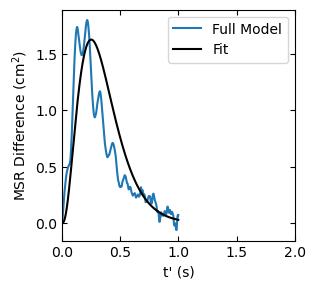

In [966]:
#heretimheretim
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,y,label='Full Model')
plt.plot(x,yhat,label='Fit',color='k')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR Difference (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.legend(fontsize=fontsize)
plt.xlim([0,2])
plt.show()

In [969]:
seed=42
# maxiter=1000
maxiter=10000  #gets the approximate final result
maxiter=100000 #2-5 minute run time
# bounds = ((0, 0.5), (0, 1),  (-3.15,3.15), (0.01,1), (0,10))
print(f"num. epochs: {maxiter}")
res = dual_annealing(
    comp_sse_dmsr_pnufixed,
    bounds = bounds,args=args,maxiter=maxiter,
    seed=seed,no_local_search=True)#,**kwargs)
rmse= np.sqrt(res.fun/t_values.shape[0])
yhat = eval_tinversion_asymmetry(x,Delta0,tau0,nu0,Delta1,tau1,phi1)#,**kwargs)
mpe = 100*np.mean(np.abs(yhat - y)/y)
Delta0,Delta1,phi1,tau0,nu0=res.x
print(f"tinversion_asymmetry/simulated_annealing_fit:")#"  {Delta0=:.4f}, {tau0=:.4f}, {nu0=:.4f} ")
# print(f"          - fit (cont'd): {Delta1=:.4f}, {tau1=:.4f}, {phi1=:.4f} --> {rmse=:.4f} cm^2")
print(f"- Delta0: {Delta0:.4f} cm^2")
print(f"- Delta1: {Delta1:.4f} cm^2")
print(f"- tau0: {tau0:.4f} seconds")
print(f"- tau1: {tau1:.4f} seconds")
print(f"- phi1: {phi1:.4f} radians")
print(f"- nu0: {nu0:.4f}")
print(f"- rmse: {rmse:.4f}")
print(f"- mpe: {mpe:.4f}%")
# print(f"time scale of time-reversal asymmetry: {tau0=:.4f} seconds")
# print(f"the oscillation period: {tau1=:.4f} seconds")

num. epochs: 100000
tinversion_asymmetry/simulated_annealing_fit:
- Delta0: 0.5834 cm^2
- Delta1: 0.1301 cm^2
- tau0: 0.1000 seconds
- tau1: 0.1037 seconds
- phi1: -0.9374 radians
- nu0: 3.6379
- rmse: 0.1430
- mpe: 63.6037%


In [ ]:
#heretimheretim
#output: plot showing the quality of fit
#visualize the fit zoomed
figsize=(3,3)
fontsize=10
fig,ax=plt.subplots(figsize=figsize)
# plt.plot(t_values,msr_values,label='Full Model')
plt.plot(x,y,label='Full Model')
plt.plot(x,yhat,label='Fit',color='k')
# plt.plot(t_values,msr_values_affoscillatory,label='fit to full')
format_plot(ax=plt.gca(),xlabel=r"t' (s)",ylabel=r"MSR Difference (cm$^2$)",fontsize=fontsize)
ax.tick_params(top=True, right=True,direction='in',which='both')
plt.legend(fontsize=fontsize)
plt.xlim([0,2])
plt.show()

In [ ]:
#DONE: compute mpe
#DONE: compute mpec,mpea,
#DONE: compute rmsec,rmsea,
#TODO: wrap to foo the simulated annealing fitter for oscillatory
#input: ??
#output: dict_oscillatory
#heretim
#TODO: wrap to foo the simulated annealing fitter for asymmetry
#input: ??
#output: dict_asymmetry
# Delta0 =
# 0.5253/scipy.special.gamma(3.03336)

In [ ]:
#heretim
#TODO: wrap to foo the simulated annealing fitter for asymmetry
#input: ??
#output: dict_asymmetry
dict_asymmetry=dict(
    Delta0=Delta0,#cm^2
    Delta1=Delta1,#cm^2
    tau0 = tau0, #seconds
    tau1 = tau1, #seconds
    phi1 = phi1, #radians
    nu0  = nu0,
    rmse=rmse, #cm^2
    mpe=mpe, #cm^2
)

In [ ]:
dict_results = dict(model_name=model_name,
    A=A,width=width,height=height,
    num_termination_events=num_termination_events,
    num_annihilations=num_annihilations,
    Gamma=Gamma,Delta_Gamma=Delta_Gamma,
    periodpp=periodpp,Delta_periodpp=Delta_periodpp,
    dict_oscillatory=dict_oscillatory,
    dict_asymmetry=dict_asymmetry)